In [ ]:
 import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/delhi_aqi.csv')



#Display the first few rows to verify it loaded correctly
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
df1=df
df1.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
# checking the shape of the dataset
df1.shape

(18776, 9)

In [ ]:
#renaming columns
df1.rename(columns = {'co':'Carbon Monoxide,μg/m3','no':'Nitrogen Oxide,μg/m3','no2':'Nitrogen Dioxide,μg/m3','o3':'Ozone,μg/m3',
          'so2':'Sulphur Dioxide,μg/m3','pm2_5':'PM2.5,μg/m3','pm10':'PM10,μg/m3','nh3':'Ammonia,μg/m3'},inplace = True)

In [ ]:
# viewing the renamed columns
df1.head()

,date,"Carbon Monoxide,μg/m3","Nitrogen Oxide,μg/m3","Nitrogen Dioxide,μg/m3","Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3"
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
#checking for missing values
df1.isnull().sum()

,0
date,0
"Carbon Monoxide,μg/m3",0
"Nitrogen Oxide,μg/m3",0
"Nitrogen Dioxide,μg/m3",0
"Ozone,μg/m3",0
"Sulphur Dioxide,μg/m3",0
"PM2.5,μg/m3",0
"PM10,μg/m3",0
"Ammonia,μg/m3",0


In [ ]:
# more meaningful air quality dataset aggregated by date, with combination of some columns

AQIData = df1.groupby(['date'])[['Carbon Monoxide,μg/m3','Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3','Ozone,μg/m3','Sulphur Dioxide,μg/m3','PM2.5,μg/m3','PM10,μg/m3','Ammonia,μg/m3']].mean()
AQIData['Carbon Monoxide,mg/m3'] = (AQIData['Carbon Monoxide,μg/m3']/1000).round(2)
AQIData= AQIData.drop(['Carbon Monoxide,μg/m3'],axis =1)
AQIData['NOx,μg/m3'] = AQIData['Nitrogen Oxide,μg/m3']+AQIData['Nitrogen Dioxide,μg/m3']
AQIData= AQIData.drop(['Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3'],axis =1)

In [ ]:
#creation of new dataframe
AQIData.head()

,"Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3","Carbon Monoxide,mg/m3","NOx,μg/m3"
date,,,,,,,
2020-11-25 01:00:00,13.59,38.62,364.61,411.73,28.63,2.62,72.78
2020-11-25 02:00:00,0.33,54.36,420.96,486.21,41.04,3.63,112.36
2020-11-25 03:00:00,1.11,68.67,463.68,541.95,49.14,4.54,152.83
2020-11-25 04:00:00,6.44,78.20,454.81,534.00,48.13,4.54,162.00
2020-11-25 05:00:00,17.17,87.74,448.14,529.19,46.61,4.38,160.82


In [ ]:
# to get subindex for Aqi bucket

def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

AQIData["PM2.5_SubIndex"] = AQIData["PM2.5,μg/m3"].apply(lambda x: PM25_subindex(x))

def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

AQIData["PM10_SubIndex"] = AQIData["PM10,μg/m3"].apply(lambda x: PM10_subindex(x))


def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

AQIData["SO2_SubIndex"] = AQIData["Sulphur Dioxide,μg/m3"].apply(lambda x: SO2_subindex(x))


def NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

AQIData["NOx_SubIndex"] = AQIData["NOx,μg/m3"].apply(lambda x: NOx_subindex(x))

def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

AQIData["CO_SubIndex"] = AQIData["Carbon Monoxide,mg/m3"].apply(lambda x: CO_subindex(x))


def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

AQIData["NH3_SubIndex"] = AQIData["Ammonia,μg/m3"].apply(lambda x: NH3_subindex(x))

AQIData["O3_SubIndex"] = AQIData["Ozone,μg/m3"].apply(lambda x: O3_subindex(x))


AQIData["Checks"] = (AQIData["PM2.5_SubIndex"] > 0).astype(int) + \
                (AQIData["PM10_SubIndex"] > 0).astype(int) + \
                (AQIData["SO2_SubIndex"] > 0).astype(int) + \
                (AQIData["NOx_SubIndex"] > 0).astype(int) + \
                (AQIData["NH3_SubIndex"] > 0).astype(int) + \
                (AQIData["CO_SubIndex"] > 0).astype(int) + \
                (AQIData["O3_SubIndex"] > 0).astype(int)

AQIData["AQI_calculated"] = round(AQIData[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))


AQIData.head(5)

,"Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3","Carbon Monoxide,mg/m3","NOx,μg/m3",PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,NH3_SubIndex,O3_SubIndex,Checks,AQI_calculated
date,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,13.59,38.62,364.61,411.73,28.63,2.62,72.78,488.161538,377.1625,48.2750,90.975,107.750,7.1575,13.59,7,488.0
2020-11-25 02:00:00,0.33,54.36,420.96,486.21,41.04,3.63,112.36,531.507692,470.2625,67.9500,132.360,120.375,10.2600,0.33,7,532.0
2020-11-25 03:00:00,1.11,68.67,463.68,541.95,49.14,4.54,152.83,564.369231,539.9375,85.8375,172.830,131.750,12.2850,1.11,7,564.0
2020-11-25 04:00:00,6.44,78.20,454.81,534.00,48.13,4.54,162.00,557.546154,530.0000,97.7500,182.000,131.750,12.0325,6.44,7,558.0
2020-11-25 05:00:00,17.17,87.74,448.14,529.19,46.61,4.38,160.82,552.415385,523.9875,102.5800,180.820,129.750,11.6525,17.17,7,552.0


In [ ]:
#categorization of AQI

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
AQIData["AQI_bucket_calculated"] = AQIData["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
AQIData = AQIData.reset_index()
AQIData.head(5)

,date,"Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3","Carbon Monoxide,mg/m3","NOx,μg/m3",PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,NH3_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,2020-11-25 01:00:00,13.59,38.62,364.61,411.73,28.63,2.62,72.78,488.161538,377.1625,48.2750,90.975,107.750,7.1575,13.59,7,488.0,Severe
1,2020-11-25 02:00:00,0.33,54.36,420.96,486.21,41.04,3.63,112.36,531.507692,470.2625,67.9500,132.360,120.375,10.2600,0.33,7,532.0,Severe
2,2020-11-25 03:00:00,1.11,68.67,463.68,541.95,49.14,4.54,152.83,564.369231,539.9375,85.8375,172.830,131.750,12.2850,1.11,7,564.0,Severe
3,2020-11-25 04:00:00,6.44,78.20,454.81,534.00,48.13,4.54,162.00,557.546154,530.0000,97.7500,182.000,131.750,12.0325,6.44,7,558.0,Severe
4,2020-11-25 05:00:00,17.17,87.74,448.14,529.19,46.61,4.38,160.82,552.415385,523.9875,102.5800,180.820,129.750,11.6525,17.17,7,552.0,Severe


In [ ]:
# dropping Subindex columns
AQIData1 = AQIData.drop(['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex','CO_SubIndex','O3_SubIndex',],axis =1)

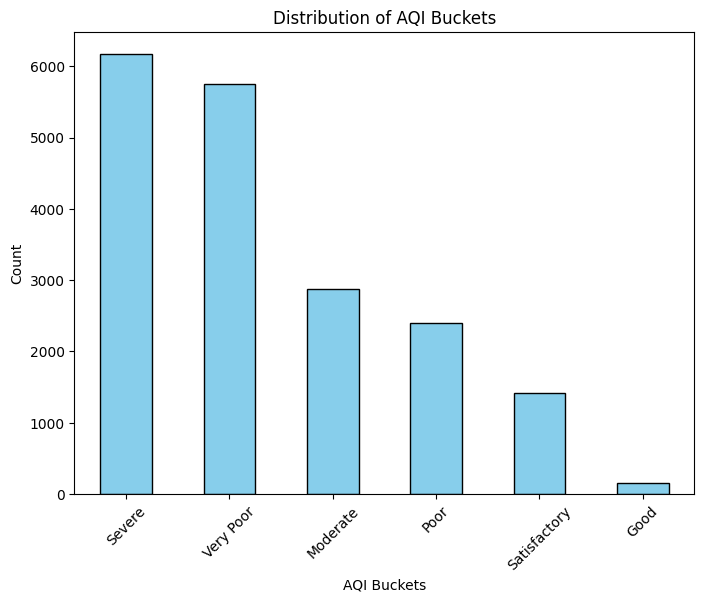

In [ ]:


# Check distribution of AQI buckets
aqi_bucket_counts = AQIData1['AQI_bucket_calculated'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
aqi_bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of AQI Buckets")
plt.xlabel("AQI Buckets")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# installing necessary libraries for solving balanced distribution

!pip install imbalanced-learn
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
#Checking balanced distribution
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Separate features and target
X = AQIData1.drop(columns=['AQI_bucket_calculated', 'date'])
y = AQIData1['AQI_bucket_calculated']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hybrid resampling
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Verify new distribution
print("Balanced Distribution After SMOTEENN:")
print(pd.Series(y_train_resampled).value_counts())



Balanced Distribution After SMOTEENN:
AQI_bucket_calculated
Good            4938
Satisfactory    4904
Severe          4787
Moderate        4772
Poor            4742
Very Poor       4629
Name: count, dtype: int64


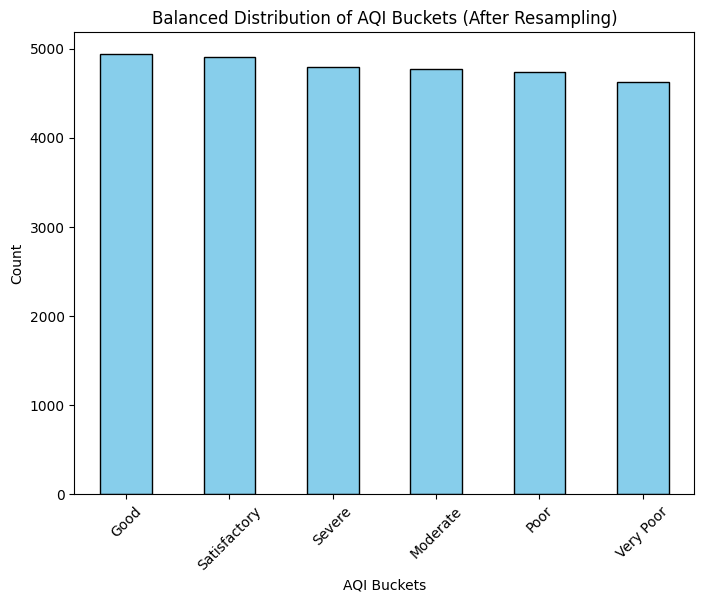

In [ ]:


# Plot the balanced class distribution
plt.figure(figsize=(8, 6))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Balanced Distribution of AQI Buckets (After Resampling)")
plt.xlabel("AQI Buckets")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
AQIData1.head()

,date,"Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3","Carbon Monoxide,mg/m3","NOx,μg/m3",Checks,AQI_calculated,AQI_bucket_calculated
0,2020-11-25 01:00:00,13.59,38.62,364.61,411.73,28.63,2.62,72.78,7,488.0,Severe
1,2020-11-25 02:00:00,0.33,54.36,420.96,486.21,41.04,3.63,112.36,7,532.0,Severe
2,2020-11-25 03:00:00,1.11,68.67,463.68,541.95,49.14,4.54,152.83,7,564.0,Severe
3,2020-11-25 04:00:00,6.44,78.20,454.81,534.00,48.13,4.54,162.00,7,558.0,Severe
4,2020-11-25 05:00:00,17.17,87.74,448.14,529.19,46.61,4.38,160.82,7,552.0,Severe


In [ ]:
AQIData2=AQIData1
AQIData2.head()

,date,"Ozone,μg/m3","Sulphur Dioxide,μg/m3","PM2.5,μg/m3","PM10,μg/m3","Ammonia,μg/m3","Carbon Monoxide,mg/m3","NOx,μg/m3",Checks,AQI_calculated,AQI_bucket_calculated
0,2020-11-25 01:00:00,13.59,38.62,364.61,411.73,28.63,2.62,72.78,7,488.0,Severe
1,2020-11-25 02:00:00,0.33,54.36,420.96,486.21,41.04,3.63,112.36,7,532.0,Severe
2,2020-11-25 03:00:00,1.11,68.67,463.68,541.95,49.14,4.54,152.83,7,564.0,Severe
3,2020-11-25 04:00:00,6.44,78.20,454.81,534.00,48.13,4.54,162.00,7,558.0,Severe
4,2020-11-25 05:00:00,17.17,87.74,448.14,529.19,46.61,4.38,160.82,7,552.0,Severe


In [ ]:
# Selecting features for prediction
x = AQIData2.drop(['AQI_calculated', 'date','AQI_bucket_calculated'],axis =1)
y = AQIData2['AQI_calculated']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Ensure datetime column is dropped before model training
X_train = X_train.drop(columns=['date'], errors='ignore')
X_test = X_test.drop(columns=['date'], errors='ignore')

# Initialize and train the Random Forest model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)

# View results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae_train = mean_absolute_error(y_train, y_pred_train_rfr)
mae_test = mean_absolute_error(y_test, y_pred_test_rfr)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rfr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_rfr))
r2_train = r2_score(y_train, y_pred_train_rfr)
r2_test = r2_score(y_test, y_pred_test_rfr)

# Display results
import pandas as pd
results_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Train Score": [mae_train, rmse_train, r2_train],
    "Test Score": [mae_test, rmse_test, r2_test]
})


# Display table
print(results_df)

     Metric  Train Score  Test Score
0       MAE     0.031824    0.115538
1      RMSE     0.306809    2.606957
2  R² Score     0.999999    0.999907


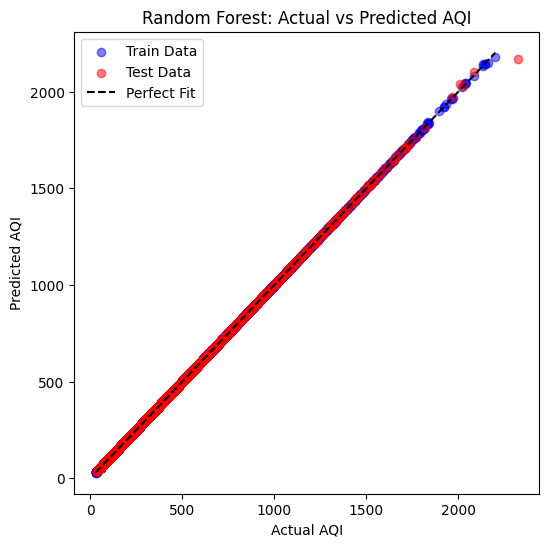

In [ ]:


# Scatter plot for training data
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_rfr, alpha=0.5, label="Train Data", color='blue')
plt.scatter(y_test, y_pred_test_rfr, alpha=0.5, label="Test Data", color='red')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='black', label="Perfect Fit")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI")
plt.legend()
plt.show()



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Compute Metrics
xgb_mae_train = mean_absolute_error(y_train, y_pred_train_xgb)
xgb_mae_test = mean_absolute_error(y_test, y_pred_test_xgb)
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
xgb_r2_train = r2_score(y_train, y_pred_train_xgb)
xgb_r2_test = r2_score(y_test, y_pred_test_xgb)



In [ ]:
# Store results in a DataFrame
xgb_results_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Train Score": [xgb_mae_train, xgb_rmse_train, xgb_r2_train],
    "Test Score": [xgb_mae_test, xgb_rmse_test, xgb_r2_test]
})

# Display table
print(xgb_results_df)


     Metric  Train Score  Test Score
0       MAE     1.098381    2.253851
1      RMSE     3.135278   12.012352
2  R² Score     0.999869    0.998019


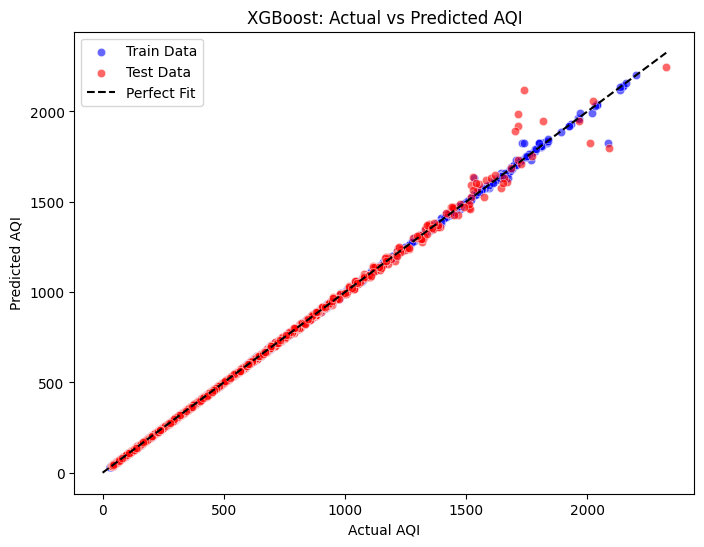

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a scatter plot for Train & Test data
plt.figure(figsize=(8, 6))

# Plot training data
sns.scatterplot(x=y_train, y=y_pred_train_xgb, color='blue', alpha=0.6, label='Train Data')

# Plot test data
sns.scatterplot(x=y_test, y=y_pred_test_xgb, color='red', alpha=0.6, label='Test Data')

# Plot perfect fit line
max_val = max(max(y_train), max(y_test))
plt.plot([0, max_val], [0, max_val], 'k--', label='Perfect Fit')

# Labels and title
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("XGBoost: Actual vs Predicted AQI")
plt.legend()
plt.show()



In [ ]:
# Convert 'date' to datetime format
AQIData2['date'] = pd.to_datetime(AQIData2['date'])

# Extract useful time features
AQIData2['year'] = AQIData2['date'].dt.year
AQIData2['month'] = AQIData2['date'].dt.month
AQIData2['day'] = AQIData2['date'].dt.day
AQIData2['hour'] = AQIData2['date'].dt.hour
AQIData2['weekday'] = AQIData2['date'].dt.weekday

# Define Features and Target for Time-Series Models
X = AQIData2.drop(columns=['AQI_calculated', 'AQI_bucket_calculated'])  # Keep time-related features
y = AQIData2['AQI_calculated']  # Target variable (AQI value)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Normalize data for LSTM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (3D: samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile model
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 187389.1406 - val_loss: 16774.4824
Epoch 2/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12752.8154 - val_loss: 5161.9727
Epoch 3/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6382.5161 - val_loss: 3559.7627
Epoch 4/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5014.0010 - val_loss: 2515.1895
Epoch 5/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4072.4888 - val_loss: 1801.2826
Epoch 6/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3357.1670 - val_loss: 1371.5236
Epoch 7/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2825.7380 - val_loss: 993.8975
Epoch 8/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2629.4685 - val_loss: 774.4260
Epoch 9/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2399.4780 - val_loss: 624.2001
Epoch 10/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2325.5413 - val_loss: 481.9742
Epoch 11/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2146.8540 - val_lo

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Get LSTM predictions
y_pred_test_lstm = lstm_model.predict(X_test_lstm).flatten()
y_pred_train_lstm = lstm_model.predict(X_train_lstm).flatten()

# Compute Evaluation Metrics
lstm_mae_train = mean_absolute_error(y_train, y_pred_train_lstm)
lstm_mae_test = mean_absolute_error(y_test, y_pred_test_lstm)

lstm_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_lstm))
lstm_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_lstm))

lstm_r2_train = r2_score(y_train, y_pred_train_lstm)
lstm_r2_test = r2_score(y_test, y_pred_test_lstm)




118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Store results in a DataFrame
lstm_results_df = pd.DataFrame({
    "Train MAE": [lstm_mae_train],
    "Test MAE": [lstm_mae_test],
    "Train RMSE": [lstm_rmse_train],
    "Test RMSE": [lstm_rmse_test],
    "Train R² Score": [lstm_r2_train],
    "Test R² Score": [lstm_r2_test]
})


# Print for verification
print(lstm_results_df)

   Train MAE   Test MAE  Train RMSE  Test RMSE  Train R² Score  Test R² Score
0  10.582203  10.493826   14.251436  13.988539        0.997289       0.997313


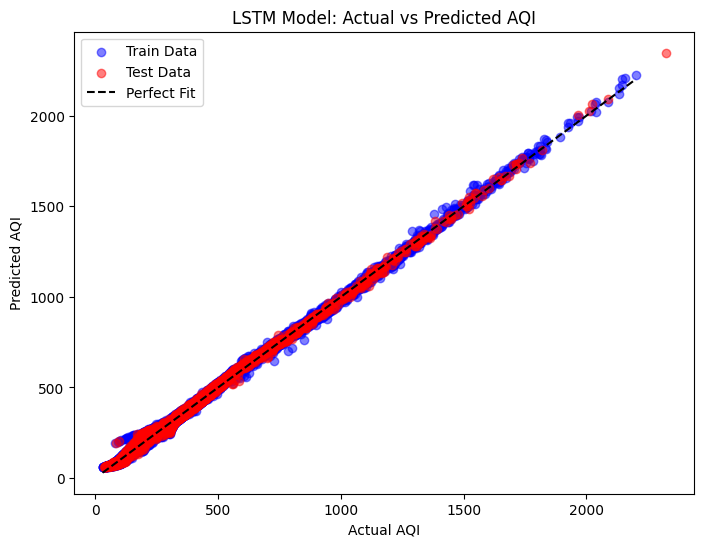

In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_lstm, color='blue', alpha=0.5, label="Train Data")
plt.scatter(y_test, y_pred_test_lstm, color='red', alpha=0.5, label="Test Data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("LSTM Model: Actual vs Predicted AQI")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention

# Transformer Block Function
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    res = x + inputs
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    return x + res

# Define Input Shape (1 Time Step for Time-Series)
inputs = Input(shape=(1, X_train.shape[1]))  # Adjust shape if needed
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

# Create Transformer Model
transformer_model = Model(inputs, x)

# Compile Model
transformer_model.compile(optimizer="adam", loss="mse")

# Print Model Summary
print(transformer_model.summary())



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1, 9)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 1, 9)           │          9,993 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1, 9)           │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 1, 9)           │             18 │ dropout_2[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 9)           │              0 │ layer_normalization[0… │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1, 128)         │          1,280 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 1, 128)         │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 9)           │          1,161 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 1, 9)           │             18 │ dense_2[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 1, 9)           │              0 │ layer_normalization_1… │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1, 64)          │            640 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 1, 64)          │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1, 1)           │             65 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,175 (51.46 KB)

 Trainable params: 13,175 (51.46 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np

# Reshape training and testing data to 3D (batch_size, time_steps=1, features)
X_train_transformer = np.expand_dims(X_train, axis=1)  # Adds a time step dimension
X_test_transformer = np.expand_dims(X_test, axis=1)

# Check shapes
print("New Transformer Input Shape:", X_train_transformer.shape)  # Expected (samples, 1, features)




New Transformer Input Shape: (15020, 1, 9)


In [ ]:

# Train Transformer Model
transformer_model.fit(X_train_transformer, y_train, epochs=20, batch_size=32, validation_data=(X_test_transformer, y_test))


Epoch 1/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 101518.7422 - val_loss: 945.7197
Epoch 2/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5298.5176 - val_loss: 243.8347
Epoch 3/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3709.3855 - val_loss: 165.7542
Epoch 4/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2791.5464 - val_loss: 200.3334
Epoch 5/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2511.6379 - val_loss: 132.6779
Epoch 6/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2303.4641 - val_loss: 97.2316
Epoch 7/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2262.7388 - val_loss: 331.7636
Epoch 8/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2263.4717 - val_loss: 29.4551
Epoch 9/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2307.7458 - val_loss: 16.0288
Epoch 10/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2240.1157 - val_loss: 20.9605
Epoch 11/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2016.8245 - val_loss: 72.5527


In [ ]:
# Make Predictions
y_pred_train_transformer = transformer_model.predict(X_train_transformer)
y_pred_test_transformer = transformer_model.predict(X_test_transformer)

# Reshape from 3D to 1D
y_pred_train_transformer = y_pred_train_transformer.flatten()
y_pred_test_transformer = y_pred_test_transformer.flatten()


470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Metrics
transformer_mae_train = mean_absolute_error(y_train, y_pred_train_transformer)
transformer_mae_test = mean_absolute_error(y_test, y_pred_test_transformer)
transformer_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_transformer))
transformer_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_transformer))
transformer_r2_train = r2_score(y_train, y_pred_train_transformer)
transformer_r2_test = r2_score(y_test, y_pred_test_transformer)

# Print Results
print("Transformer Model Performance:")
print(f"Train MAE: {transformer_mae_train}, Test MAE: {transformer_mae_test}")
print(f"Train RMSE: {transformer_rmse_train}, Test RMSE: {transformer_rmse_test}")
print(f"Train R²: {transformer_r2_train}, Test R²: {transformer_r2_test}")


Transformer Model Performance:
Train MAE: 5.109224132151801, Test MAE: 4.9957176915372905
Train RMSE: 7.389112166223393, Test RMSE: 7.291992681210963
Train R²: 0.9992712080509641, Test R²: 0.9992698720814315


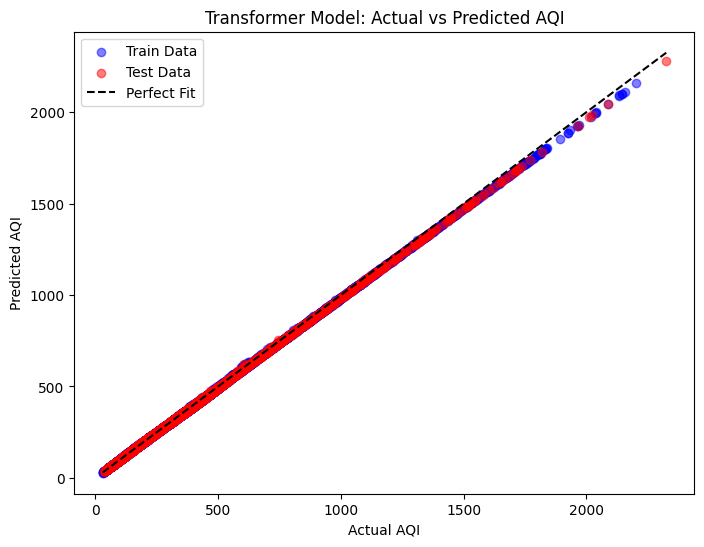

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.figure(figsize=(8, 6))

# Train Data (Blue)
plt.scatter(y_train, y_pred_train_transformer, color='blue', alpha=0.5, label="Train Data")

# Test Data (Red)
plt.scatter(y_test, y_pred_test_transformer, color='red', alpha=0.5, label="Test Data")

# Perfect Fit Line (Black Dotted)
perfect_fit = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 100)
plt.plot(perfect_fit, perfect_fit, 'k--', label="Perfect Fit")

# Labels & Title
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Transformer Model: Actual vs Predicted AQI")
plt.legend()

# Show plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R² Score": r2}

# Store results for each model
results = []
results.append(evaluate_model(y_test, y_pred_test_rfr, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_test_xgb, "XGBoost"))
results.append(evaluate_model(y_test, y_pred_test_lstm.flatten(), "LSTM"))
results.append(evaluate_model(y_test, y_pred_test_transformer.flatten(), "Transformer"))

# Convert to DataFrame
results_df = pd.DataFrame(results)


# Print for verification
print(results_df)


           Model        MAE       RMSE  R² Score
0  Random Forest   0.115538   2.606957  0.999907
1        XGBoost   2.253851  12.012352  0.998019
2           LSTM  10.493826  13.988539  0.997313
3    Transformer   4.995718   7.291993  0.999270


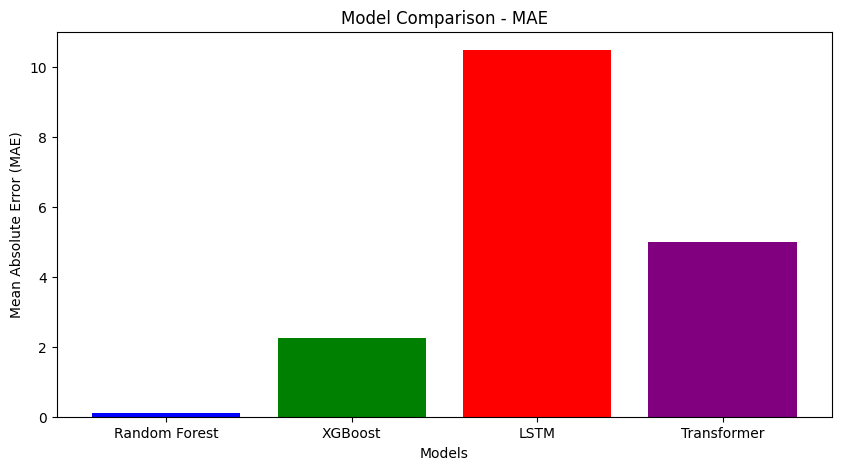

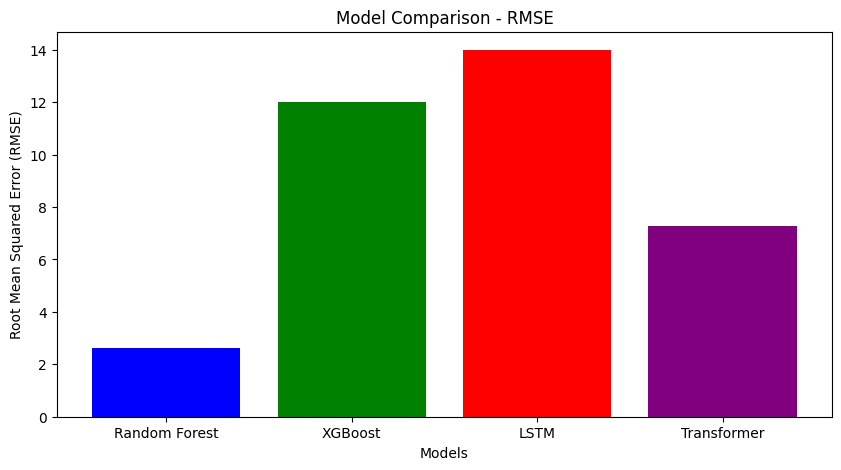

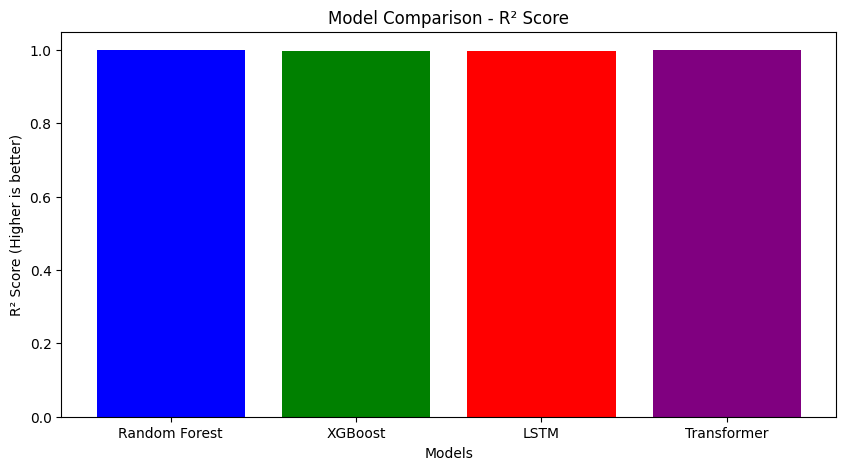

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for MAE
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["MAE"], color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison - MAE")
plt.show()

# Bar chart for RMSE
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["RMSE"], color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Comparison - RMSE")
plt.show()

# Bar chart for R² Score
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["R² Score"], color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("R² Score (Higher is better)")
plt.title("Model Comparison - R² Score")
plt.show()


In [ ]:
!pip install lime
!pip install lime

import shap
import lime
import lime.lime_tabular

# Train SHAP Explainer on the Random Forest Model
explainer = shap.Explainer(rfr, X_train)
shap_values = explainer(X_test)




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=11b9cabff5a96f92769b937a970d50823320840021551c368c4554e56b36d21a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


100%|===================| 3738/3756 [00:27<00:00]       

 96%|=================== | 3603/3756 [00:44<00:01]       

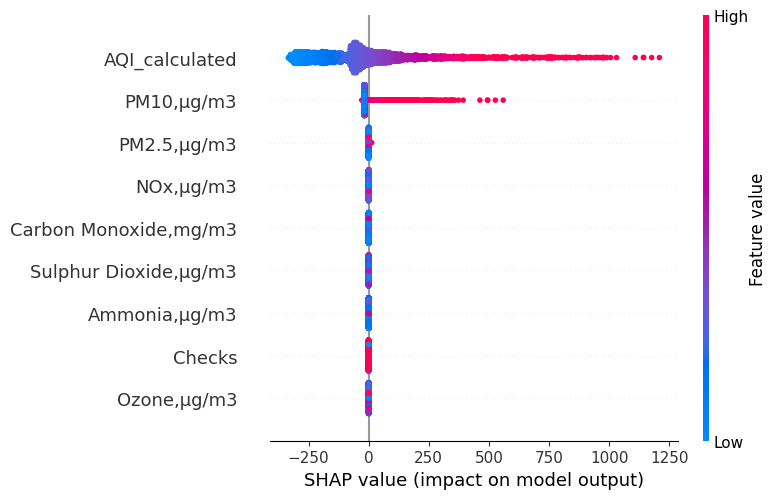

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(rfr, X_train)
shap_values = explainer(X_test)

# Summary plot - feature importance visualization
shap.summary_plot(shap_values, X_test)


In [ ]:
# Compute SHAP feature importance for Random Forest
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for feature importance
shap_importance_df = pd.DataFrame({'Feature': X_test.columns, 'SHAP Importance': shap_importance})
shap_importance_df = shap_importance_df.sort_values(by='SHAP Importance', ascending=False).head(10)


In [ ]:
import pandas as pd



# If you want a more visually appealing display in Jupyter Notebook:
from IPython.display import display
display(shap_importance_df)


,Feature,SHAP Importance
8,AQI_calculated,166.684223
3,"PM10,μg/m3",25.736634
2,"PM2.5,μg/m3",0.201289
6,"NOx,μg/m3",0.006564
5,"Carbon Monoxide,mg/m3",0.005734
1,"Sulphur Dioxide,μg/m3",0.004815
4,"Ammonia,μg/m3",0.003072
7,Checks,0.001753
0,"Ozone,μg/m3",0.001580


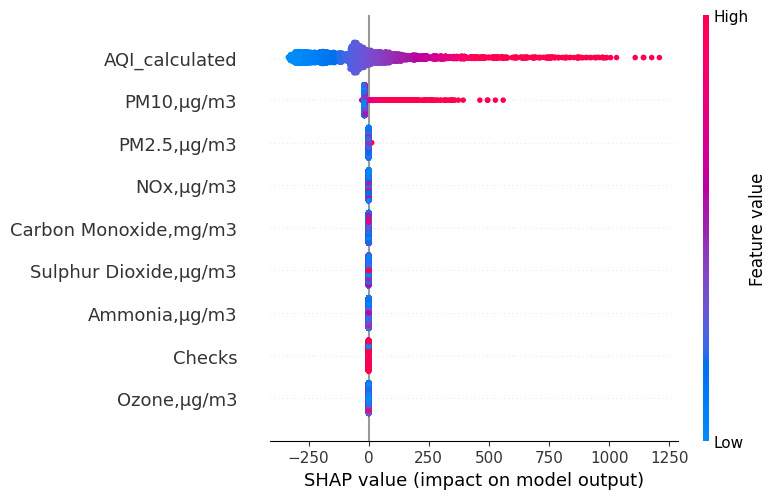

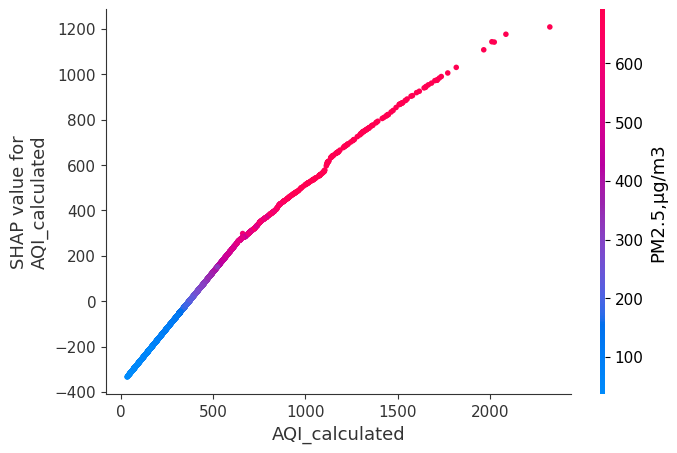

In [ ]:
import shap
import matplotlib.pyplot as plt

# Summary plot
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test)

# Dependence plot for the most important feature
most_important_feature = shap_importance_df.iloc[0]['Feature']
shap.dependence_plot(most_important_feature, shap_values.values, X_test)

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Select a random instance from the test set to explain
idx = np.random.randint(0, X_test.shape[0])
lime_exp = lime_explainer.explain_instance(X_test.iloc[idx].values, rfr.predict, num_features=10)

# Display the explanation
lime_exp.show_in_notebook(show_table=True, show_all=False)
